In [28]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from src.utils import read_config
from urllib.request import urlopen
import certifi
import json

from src.plot_func import plot_cashflow

In [32]:
config = read_config('../.env/configs.json')

# Get data

### FMP

In [68]:
def get_jsonparsed_data(url):
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    data_json = json.loads(data)
    return pd.DataFrame(data_json)


def get_fp(topic, stock, apikey) -> pd.DataFrame:

    url = f'https://financialmodelingprep.com/api/v3/{topic}/{stock}?limit=10&apikey={apikey}'
    print(url)
    df = get_jsonparsed_data(url)
    
    return df.sort_values('date', ascending=True)

stock = "AAPL"
fmpkey = config['fmpkey']

df_aapl_cashflow = get_fp('cash-flow-statement', stock, fmpkey)

https://financialmodelingprep.com/api/v3/cash-flow-statement/AAPL?limit=10&apikey=5ac80141f5198c04645adbd90ba2aef1


C:\Users\sean.chang\AppData\Local\Temp\ipykernel_29240\3407431755.py:2: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


In [69]:
df_aapl_cashflow

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,netIncome,depreciationAndAmortization,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
4,2019-09-28,AAPL,USD,0000320193,2019-10-31,2019-10-30 18:12:36,2019,FY,55256000000,12547000000,...,-90976000000,0,24311000000,50224000000,25913000000,69391000000,-10495000000,58896000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,57411000000,11056000000,...,-86820000000,0,-10435000000,39789000000,50224000000,80674000000,-7309000000,73365000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,94680000000,11284000000,...,-93353000000,0,-3860000000,35929000000,39789000000,104038000000,-11085000000,92953000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2022-09-24,AAPL,USD,0000320193,2022-10-28,2022-10-27 18:01:14,2022,FY,99803000000,11104000000,...,-110749000000,0,-10952000000,24977000000,35929000000,122151000000,-10708000000,111443000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
0,2023-09-30,AAPL,USD,0000320193,2023-11-03,2023-11-02 18:08:27,2023,FY,96995000000,11519000000,...,-108488000000,0,5760000000,30737000000,24977000000,110543000000,-10959000000,99584000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


In [52]:
df_aapl_cashflow.columns

Index(['date', 'symbol', 'reportedCurrency', 'cik', 'fillingDate',
       'acceptedDate', 'calendarYear', 'period', 'netIncome',
       'depreciationAndAmortization', 'deferredIncomeTax',
       'stockBasedCompensation', 'changeInWorkingCapital',
       'accountsReceivables', 'inventory', 'accountsPayables',
       'otherWorkingCapital', 'otherNonCashItems',
       'netCashProvidedByOperatingActivities',
       'investmentsInPropertyPlantAndEquipment', 'acquisitionsNet',
       'purchasesOfInvestments', 'salesMaturitiesOfInvestments',
       'otherInvestingActivites', 'netCashUsedForInvestingActivites',
       'debtRepayment', 'commonStockIssued', 'commonStockRepurchased',
       'dividendsPaid', 'otherFinancingActivites',
       'netCashUsedProvidedByFinancingActivities',
       'effectOfForexChangesOnCash', 'netChangeInCash', 'cashAtEndOfPeriod',
       'cashAtBeginningOfPeriod', 'operatingCashFlow', 'capitalExpenditure',
       'freeCashFlow', 'link', 'finalLink'],
      dtype='obje

In [142]:
base_column = ['symbol', 'calendarYear']

### yfinance

In [2]:
def get_ticker(ticker):
    ticker = yf.Ticker(ticker)

    return ticker


ticker = get_ticker('AAPL')

In [7]:
def obtain_cashflow(ticker):

    cashflow = ticker.cashflow

    return cashflow


data = obtain_cashflow(ticker).iloc[:, :4]
data_T = data.T.reset_index(names='date')

### Help functions

In [64]:
def plot_linechart(data, x_col, y_cols, title, xlabel='X-axis', ylabel='Y-axis', 
                   figsize=(10, 6), line_styles=None, markers=None, colors=None, legend=True):
    """
    A generalized function to plot line charts for multiple columns.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    x_col (str): The column name for the x-axis.
    y_cols (list of str): List of column names to plot on the y-axis.
    title (str): Title of the plot.
    xlabel (str): Label for the x-axis (default is 'X-axis').
    ylabel (str): Label for the y-axis (default is 'Y-axis').
    figsize (tuple): Size of the plot (default is (10, 6)).
    line_styles (list of str): List of line styles for each y-axis column (default is None).
    markers (list of str): List of markers for each line (default is None).
    colors (list of str): List of colors for each line (default is None).
    legend (bool): Whether to display a legend (default is True).
    """
    plt.figure(figsize=figsize)
    
    # Iterate through y_cols to plot each line
    for i, y_col in enumerate(y_cols):
        style = line_styles[i] if line_styles and i < len(line_styles) else '-'
        marker = markers[i] if markers and i < len(markers) else None
        color = colors[i] if colors and i < len(colors) else None
        
        plt.plot(data[x_col], data[y_col], label=y_col, linestyle=style, marker=marker, color=color)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    if legend:
        plt.legend()
    
    plt.grid(True)
    plt.show()

In [159]:
def get_variation(df, col, new_colname):

    data = df[['calendarYear', col]].copy()

    # Calculate variation with respect to the previous year
    data.loc[:, new_colname] = round(((data[col] - data[col].shift(1))/data[col].shift(1)),2)

    return data.dropna()

In [137]:
def plot_variation(data, date_col, variation_col, title, 
                   xlabel="Date", ylabel="Variation", figsize=(10, 6), bar_width=0.4):
    """
    Function to plot the yearly variation in net income with color-coded bars.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    date_col (str): The name of the column containing the date.
    variation_col (str): The name of the column containing the variation values.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    figsize (tuple): The size of the plot (default is (10, 6)).
    bar_width (float): The width of the bars (default is 0.4).
    """

    # Define colors based on whether the variation is positive or negative
    colors = ['green' if val > 0 else 'red' for val in data[variation_col]]
    
    # Plotting the bar chart
    plt.figure(figsize=figsize)
    plt.bar(data[date_col], data[variation_col], color=colors, width=bar_width)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.axhline(0, color='black', linewidth=0.5)

    # Removing the grid lines
    plt.grid(False)
    
    plt.show()

# Break Down the Cash Flow Sections

## Operating Activities

Operating Activities  
This section tells you how much cash the company generates from its core operations. Look at:

- Net Income: This gives you a baseline of the profitability.
- Depreciation & Amortization: Non-cash expenses that reduce net income but do not affect cash flow.
- Changes in Working Capital( $\Delta$ WC): Variations in accounts receivable, inventory, and payable
    - working capital: 營運資本
    - formula: $\Delta$ AR(accounts receivables) + $\Delta$ Invectory - $\Delta$ AP(accounts payables) + $\Delta$ otherWC
        - $\Delta$ means the values in 2020 - values in 2019

In [143]:
columns_operating_activities = [
    'netCashProvidedByOperatingActivities',
    'netIncome',
    'depreciationAndAmortization',
    'changeInWorkingCapital',
    'accountsReceivables',
    'inventory',
    'accountsPayables',
    'otherWorkingCapital'
]

df_aapl_cashflow[base_column + columns_operating_activities]


# depreciation 折舊
# amortization 攤銷

,symbol,calendarYear,netCashProvidedByOperatingActivities,netIncome,depreciationAndAmortization,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital
4,AAPL,2019,69391000000,55256000000,12547000000,-3488000000,245000000,-289000000,-1923000000,-625000000
3,AAPL,2020,80674000000,57411000000,11056000000,5690000000,6917000000,-127000000,-4062000000,2081000000
2,AAPL,2021,104038000000,94680000000,11284000000,-4911000000,-10125000000,-2642000000,12326000000,1676000000
1,AAPL,2022,122151000000,99803000000,11104000000,1200000000,-1823000000,1484000000,9448000000,478000000
0,AAPL,2023,110543000000,96995000000,11519000000,-6577000000,-1688000000,-1618000000,-1889000000,0


### Net Operating Cash Flow

In [190]:
df_operationCash = get_variation(df_aapl_cashflow[['calendarYear', 'netCashProvidedByOperatingActivities']],
                                 col='netCashProvidedByOperatingActivities',
                                 new_colname='Net Operating Cash Flow Growth')
df_operationCash

,calendarYear,netCashProvidedByOperatingActivities,Net Operating Cash Flow Growth
3,2020,80674000000,0.16
2,2021,104038000000,0.29
1,2022,122151000000,0.17
0,2023,110543000000,-0.10


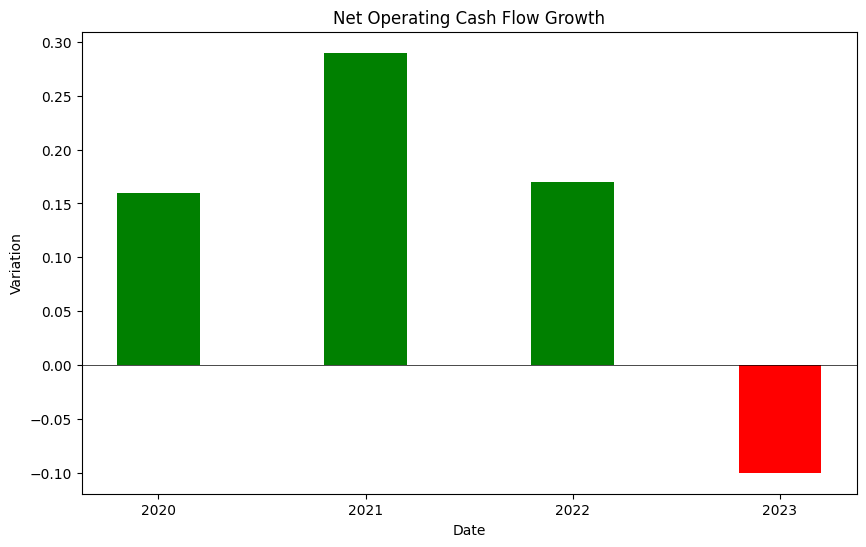

In [191]:
plot_variation(
    df_operationCash, 
    date_col='calendarYear', 
    variation_col='Net Operating Cash Flow Growth',
    title='Net Operating Cash Flow Growth'
)

### Net Income

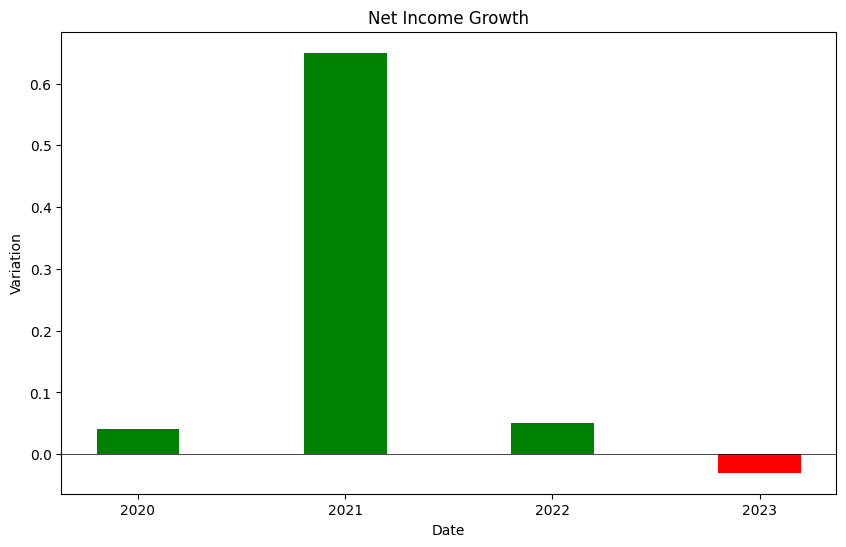

In [186]:
df_netincome = get_variation(df_aapl_cashflow[['calendarYear', 'netIncome']], col='netIncome', new_colname='netIncomeChange')
plot_variation(
    df_netincome, 
    date_col='calendarYear', 
    variation_col='netIncomeChange',
    title='Net Income Growth'
)

### Changes in Working Capital

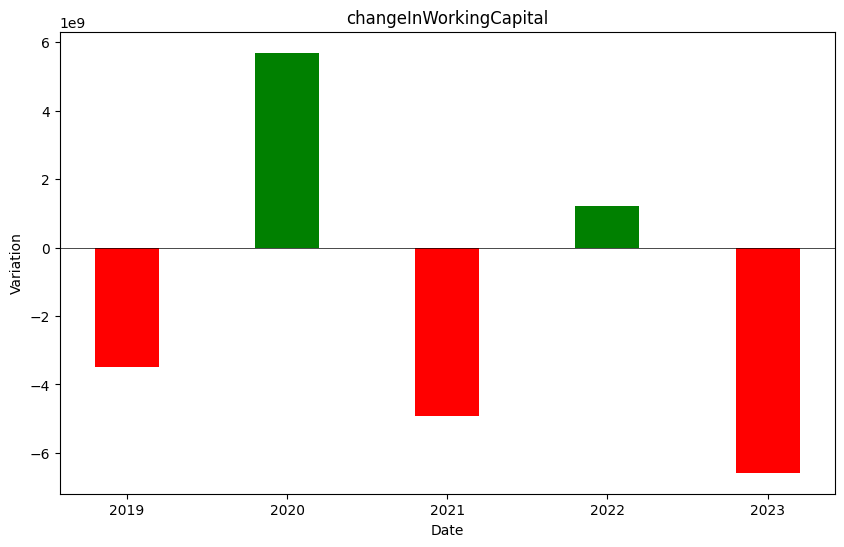

In [185]:
df_wc  = df_aapl_cashflow[['calendarYear', 'changeInWorkingCapital']]

plot_variation(
    df_wc, 
    date_col='calendarYear', 
    variation_col='changeInWorkingCapital',
    title='changeInWorkingCapital'
)

### Depreciation, Depletion & Amortization

In [182]:
df_depreciationAndAmortization = df_aapl_cashflow[['calendarYear', 'depreciationAndAmortization']]
df_depreciationAndAmortization_variatoin = get_variation(df_depreciationAndAmortization, col='depreciationAndAmortization', new_colname='depreciationAndAmortization_variation')
df_depreciationAndAmortization_variatoin

,calendarYear,depreciationAndAmortization,depreciationAndAmortization_variation
3,2020,11056000000,-0.12
2,2021,11284000000,0.02
1,2022,11104000000,-0.02
0,2023,11519000000,0.04


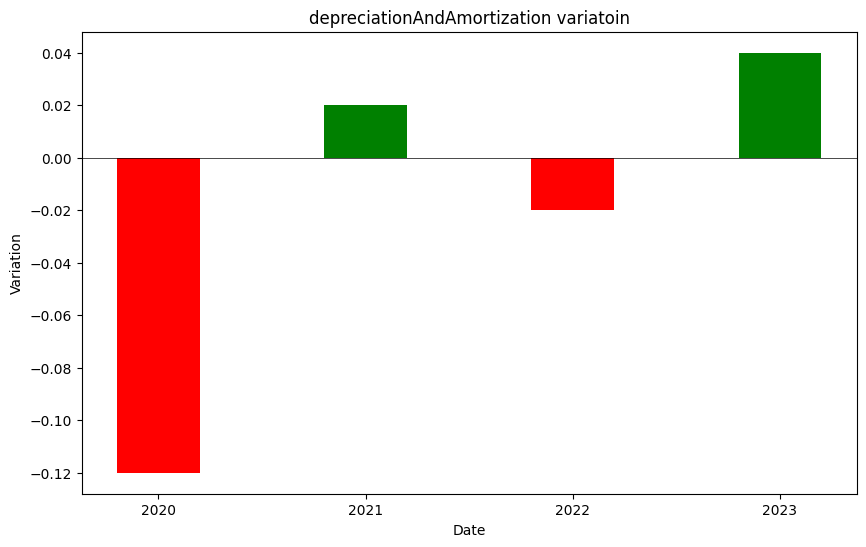

In [184]:
plot_variation(
    df_depreciationAndAmortization_variatoin, 
    date_col='calendarYear', 
    variation_col='depreciationAndAmortization_variation',
    title='depreciationAndAmortization variatoin'
)

## Investing Activities

Investing Activities  
This section reflects where Apple is investing its capital, often in:

- Capital Expenditures (CapEx): Investments in physical assets like factories, stores, or equipment. A rising CapEx might indicate expansion.
- Purchases/Sales of Investments: Apple holds a large portfolio of marketable securities. Analyze how much of their cash flow is tied up in investments versus being deployed in business operations.

c. Financing Activities
This shows how Apple finances its operations and returns cash to shareholders:

- Share Buybacks: Apple has been repurchasing a large number of shares.
- Dividend Payments: Regular cash outflow to shareholders.
- Debt Issuance/Repayment: Analyze whether Apple is issuing debt or repaying it. Despite large cash reserves, Apple has issued debt due to historically low-interest rates.

# Key Ratios and Metrics

- Free Cash Flow (FCF):  
FCF = Operating Cash Flow - Capital Expenditures  
This is a key metric to see how much cash is available after Apple covers its basic operational expenses.
- Cash Conversion Ratio (CCR):  
CCR = Operating Cash Flow / Net Income  
This ratio shows how well Apple converts its net income into cash.

In [62]:
# FCF
df_aapl_cashflow['freeCashFlow'] = df_aapl_cashflow['operatingCashFlow'] - df_aapl_cashflow['capitalExpenditure']
df_aapl_cashflow[['date', 'freeCashFlow']]

,date,freeCashFlow
0,2023-09-30,121502000000
1,2022-09-24,132859000000
2,2021-09-25,115123000000
3,2020-09-26,87983000000
4,2019-09-28,79886000000
